In [17]:
import time

import numpy as np
from astropy.cosmology import FlatLambdaCDM
from multiprocessing import Process
import matplotlib.pyplot as plt
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
import sys
sys.path.insert(1, '../coderesources')
import fitClusParallel as myfit
import priors
import emcee
import os
import TestParallelModule as tpm
import corner
from multiprocessing import Pool

zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}

cluster = 'a2744'

Read deflection data from file Files/a2744-def1-scale1.pkl
Read deflection data from file Files/Deflections/a2744-sigma-defs.pkl


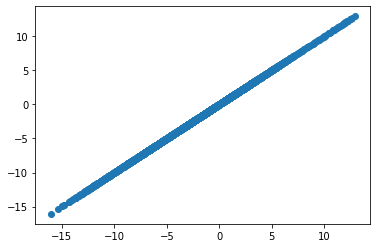

In [16]:
#compare Catie's def files with mine

compdef = myfit.defclass()
compdef.load("Files/a2744-def1-scale1")

mydef = myfit.defclass()
mydef.load("Files/Deflections/a2744-sigma-defs")

plt.scatter(compdef.marr, mydef.marr)

In [19]:
#run with Catie's deflection files

zlens = zclus[cluster]

# load the images
imgdat = myfit.imgclass("Files/" + cluster + '_images_0.5.dat',zlens,cosmo)

# halo
halo = myfit.haloclass()
halo.load("Files/" + cluster + "halo.dat",logflags=[True,True])

# deflection distributions (simulated separately)
losdef = myfit.defclass()
losdef.load("Files/" + cluster + "_def1-los")

deffile = "Files/a2744-def1-scale1"
memdef = myfit.defclass()
memdef.load(deffile)


# lensmodel setup; remember to include the specific priors
lm = myfit.lensmodel(imgdat,halo,memdef,losdef)
lm.setprior(priors.func)

# initialize the fit
fit = myfit.fitclass(lm.lnP)


# set the parameters
pgal = pgals[cluster]
phalo = np.array(halo.p).flatten().tolist()
pshr = halo.pshr
pref = pgal + phalo + pshr
plabels = ['bgal', 'agal', 'alos',
 'b1', 'x1', 'y1', 'ec1', 'es1', 's1',
 'b2', 'x2', 'y2', 'ec2', 'es2', 's2',
 'b3', 'x3', 'y3', 'ec3', 'es3', 's3',
 'gc', 'gs']

    
# check one set of parameters
tmp = lm.lnP(pref)
print(tmp)
print('chisq:',-2.0*tmp['chisq'])

# optimize
fit.optimize(pref,restart=5)
print(fit.best.message)
print(fit.best.x)
print(fit.best.fun)
tmp = lm.lnP(fit.best.x)
print(tmp)
print('chisq:',-2.0*tmp['chisq'])


# run MCMC
outbase = "Files/mcmc/fiducial/testingabellorig"

fit.MCset(nburn = 5000, nstep = 10000, basename = outbase + 'mc')
fit.MCrun2(lm)

# make plots

fit.MCplot(outbase+'-mc.pdf',labels=plabels,fmt='.3f',truths=pref)

Read image data from file Files/a2744_images_0.5.dat
Read halo data from file Files/a2744halo.dat
Read deflection data from file Files/a2744_def1-los.pkl
Read deflection data from file Files/Deflections/a2744-sigma-defs.pkl
{'posterior': -63.41386211036361, 'chisq': -16.481739855138585, 'norm': -46.92904210618072, 'prior': -0.003080149044311111, 'chipri': -16.484820004182897}
chisq: 32.96347971027717


KeyboardInterrupt: 

Read image data from file Files/a2744_images_0.5.dat
Read halo data from file Files/a2744halo.dat
Read deflection data from file Files/a2744_def1-los.pkl
Read deflection data from file Files/Deflections/a2744-sigma-defs.pkl
{'posterior': -63.41386211036361, 'chisq': -16.481739855138585, 'norm': -46.92904210618072, 'prior': -0.003080149044311111, 'chipri': -16.484820004182897}
chisq: 32.96347971027717
Optimize step 1 not done
[ 1.91323974e-01  1.79995034e+00  2.00000000e+00  1.19506111e+00
 -1.12320409e+01 -2.86961428e+01 -1.38794609e-01 -2.59255000e-01
  6.91422381e-01  6.87352649e-01  5.53683241e+00 -6.23424293e+00
  6.66563264e-01 -3.28008166e-02  5.36925246e-02  9.69583078e-01
  7.98311891e+01  3.28874075e+01 -1.59798256e-02  2.82874520e-02
  9.67755591e-01  6.14042099e-02 -1.23709668e-01]
57.13127718438966
Optimize step 2 not done
[ 1.57822264e-01  1.80724146e+00  2.00003084e+00  1.20971092e+00
 -1.12336512e+01 -2.86686106e+01 -1.21429506e-01 -2.58618854e-01
  6.94779209e-01  6.913

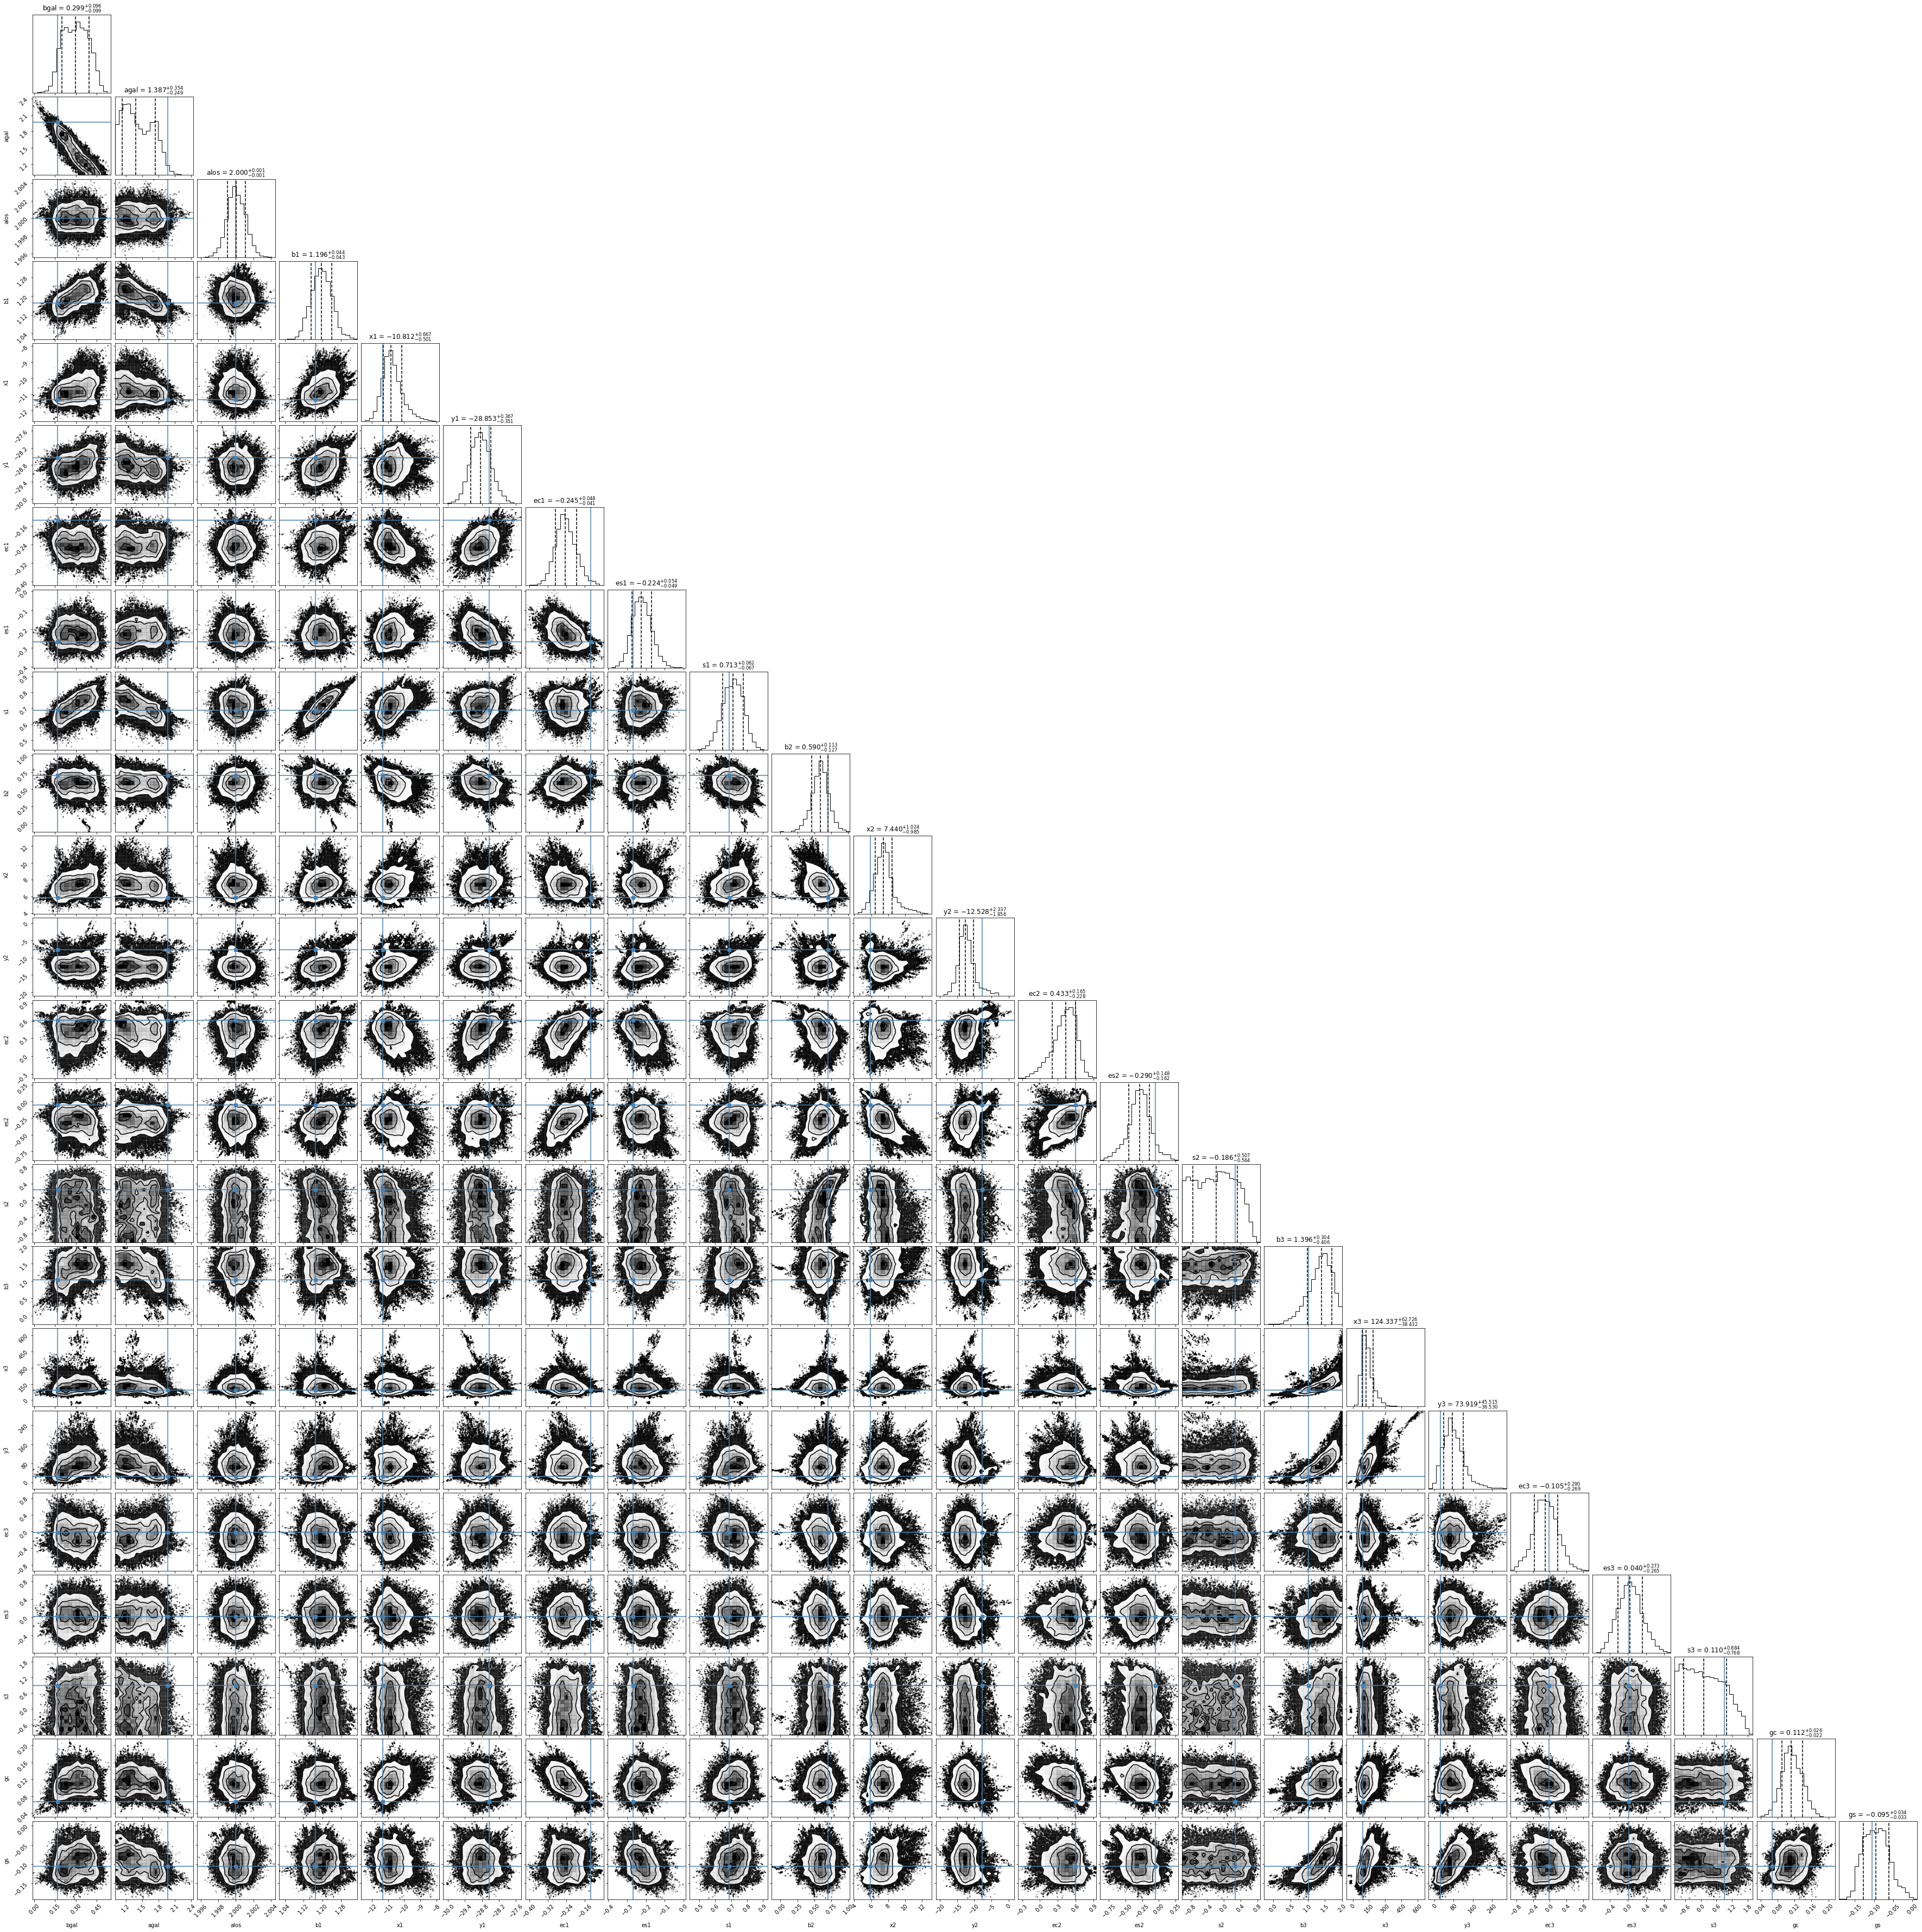

In [20]:
#run with my sigma deflection files
#run with Catie's deflection files

zlens = zclus[cluster]

# load the images
imgdat = myfit.imgclass("Files/" + cluster + '_images_0.5.dat',zlens,cosmo)

# halo
halo = myfit.haloclass()
halo.load("Files/" + cluster + "halo.dat",logflags=[True,True])

# deflection distributions (simulated separately)
losdef = myfit.defclass()
losdef.load("Files/" + cluster + "_def1-los")

deffile = "Files/Deflections/a2744-sigma-defs"
memdef = myfit.defclass()
memdef.load(deffile)


# lensmodel setup; remember to include the specific priors
lm = myfit.lensmodel(imgdat,halo,memdef,losdef)
lm.setprior(priors.func)

# initialize the fit
fit = myfit.fitclass(lm.lnP)


# set the parameters
pgal = pgals[cluster]
phalo = np.array(halo.p).flatten().tolist()
pshr = halo.pshr
pref = pgal + phalo + pshr
plabels = ['bgal', 'agal', 'alos',
 'b1', 'x1', 'y1', 'ec1', 'es1', 's1',
 'b2', 'x2', 'y2', 'ec2', 'es2', 's2',
 'b3', 'x3', 'y3', 'ec3', 'es3', 's3',
 'gc', 'gs']

    
# check one set of parameters
tmp = lm.lnP(pref)
print(tmp)
print('chisq:',-2.0*tmp['chisq'])

# optimize
fit.optimize(pref,restart=5)
print(fit.best.message)
print(fit.best.x)
print(fit.best.fun)
tmp = lm.lnP(fit.best.x)
print(tmp)
print('chisq:',-2.0*tmp['chisq'])


# run MCMC
outbase = "Files/mcmc/fiducial/testingabellorig"

fit.MCset(nburn = 5000, nstep = 10000, basename = outbase + 'mc')
fit.MCrun2(lm)

# make plots

fit.MCplot(outbase+'-mc.pdf',labels=plabels,fmt='.3f',truths=pref)